# Machine Learning Capstone

***

## Project Description

In this activity, you will showcase your ability to use Python for model building and data analysis. You will deploy different models to analyze a dataset and generate business insights for your stakeholders. In particular, you will build and evaluate a logistic regression model or the following machine learning models: decision tree, random forest, XGBoost. You will also update your stakeholders through an executive summary, demonstrating your ability to organize and communicate key information. 

As a specialist in data analysis, the leadership team leaves it up to you to choose an approach for building the most effective model to predict employee departure. For example, you could build and evaluate a statistical model such as logistic regression. Or, you could build and evaluate machine learning models such as decision tree, random forest, and XGBoost. Or, you could choose to deploy both statistical and machine learning models. 

For any approach, you’ll need to analyze the key factors driving employee turnover, build an effective model, and share recommendations for next steps with the leadership team. 

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| satisfaction_level |	The employee’s self-reported satisfaction level [0-1]|
| last_evaluation|	Score of employee's last performance review [0-1]|
| number_project |	Number of projects employee contributes to |
| average_monthly_hours |	Average number of hours employee worked per month |
| time_spend_company | How long the employee has been with the company (years)	|
| work_accident | Whether or not the employee experienced an accident while at work	|
| promotion_last_5years | Whether or not the employee was promoted in the last 5 years	|
| department |	The employee's department |
| salary |	The employee's salary (low, medium, or high) |
| left | Whether or not the employee left the company |

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


import datetime
from datetime import datetime, timedelta

import scipy.stats
from collections import Counter


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

import sklearn
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2
#from sklearn.inspection import permutation_importance

from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

#from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, plot_tree
#from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
#from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor



%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.72,0.88,3,189,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0
13996,0.53,0.91,4,167,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0
13997,0.81,0.80,5,132,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0
13998,0.58,0.90,3,209,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       14000 non-null  float64
 1   last_evaluation          14000 non-null  float64
 2   number_project           14000 non-null  int64  
 3   average_monthly_hours    14000 non-null  int64  
 4   time_spend_company       14000 non-null  int64  
 5   work_accident_1          14000 non-null  int64  
 6   promotion_last_5years_1  14000 non-null  int64  
 7   department_RandD         14000 non-null  int64  
 8   department_accounting    14000 non-null  int64  
 9   department_hr            14000 non-null  int64  
 10  department_management    14000 non-null  int64  
 11  department_marketing     14000 non-null  int64  
 12  department_product_mng   14000 non-null  int64  
 13  department_sales         14000 non-null  int64  
 14  department_support    

In [5]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left
count,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00,14000.00
mean,0.62,0.72,3.80,200.73,3.46,0.15,0.02,0.05,0.05,0.05,0.04,0.06,0.06,0.27,0.15,0.18,0.48,0.43,0.20
std,0.24,0.17,1.19,49.27,1.46,0.36,0.14,0.23,0.22,0.22,0.20,0.23,0.24,0.45,0.36,0.39,0.50,0.50,0.40
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.45,0.56,3.00,157.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.65,0.72,4.00,200.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,244.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [6]:
df.shape

(14000, 19)

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident_1', 'promotion_last_5years_1', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical', 'salary_low', 'salary_medium', 'left'], dtype='object')

***

## Create a random dataset for Hyperparameter Tuning

In [8]:
df_random = df.sample(n=3500)

In [9]:
df_random

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left
6038,0.53,0.62,3,185,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0
10758,0.51,0.52,5,261,3,1,0,1,0,0,0,0,0,0,0,0,1,0,0
13882,0.71,0.93,5,140,8,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2760,0.54,0.49,4,152,3,1,0,0,0,0,0,0,0,1,0,0,0,1,0
10778,0.92,0.98,3,257,3,0,1,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5475,0.64,0.75,4,170,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6942,0.79,0.81,4,203,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8882,0.25,0.45,3,228,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0
462,0.80,0.53,3,255,5,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [10]:
X_random = df_random.iloc[:,:18]
y_random = df_random.iloc[:,18]

In [11]:
X_random.values, y_random.values

(array([[0.53, 0.62, 3.  , ..., 0.  , 0.  , 1.  ],
        [0.51, 0.52, 5.  , ..., 0.  , 1.  , 0.  ],
        [0.71, 0.93, 5.  , ..., 0.  , 0.  , 1.  ],
        ...,
        [0.25, 0.45, 3.  , ..., 0.  , 0.  , 1.  ],
        [0.8 , 0.53, 3.  , ..., 1.  , 0.  , 0.  ],
        [0.69, 0.81, 5.  , ..., 1.  , 0.  , 1.  ]]),
 array([0, 0, 0, ..., 0, 1, 0], dtype=int64))

In [12]:
#X_random_train, X_random_test, y_random_train, y_random_test = train_test_split(X_random, y_random, test_size=0.2, random_state=0, stratify=y_random)

In [13]:
#X_random_train.shape, X_random_test.shape, y_random_train.shape, y_random_test.shape

***

## Train Test Split

In [14]:
X = df.iloc[:,:18]
y = df.iloc[:,18]

In [15]:
X.values, y.values

(array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
        [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
        [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
        ...,
        [0.81, 0.8 , 5.  , ..., 0.  , 0.  , 0.  ],
        [0.58, 0.9 , 3.  , ..., 0.  , 0.  , 0.  ],
        [0.82, 0.56, 2.  , ..., 0.  , 0.  , 0.  ]]),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11200, 18), (2800, 18), (11200,), (2800,))

## Feature Scaling

In [18]:
X_train

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
377,0.44,0.56,2,158,3,0,0,0,1,0,0,0,0,0,0,0,0,1
2351,0.81,0.85,3,263,3,1,0,0,0,0,0,0,0,0,0,0,1,0
503,0.43,0.51,2,155,3,0,0,0,0,0,0,0,0,0,0,1,0,1
3090,0.49,0.61,5,133,3,0,0,0,0,0,0,0,0,0,0,1,1,0
6509,1.00,0.95,3,275,3,1,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8528,0.98,0.62,5,260,2,1,0,0,0,0,0,0,0,0,1,0,1,0
10387,0.76,0.61,4,172,2,0,0,0,0,0,0,1,0,0,0,0,1,0
6439,0.18,0.92,5,251,4,0,0,0,1,0,0,0,0,0,0,0,0,1
13398,0.49,0.91,4,134,4,0,0,0,1,0,0,0,0,0,0,0,1,0


In [19]:
minmax = MinMaxScaler()

In [20]:
X_train_scaled = minmax.fit_transform(X_train)

In [21]:
X_test_scaled = minmax.transform(X_test)

In [22]:
X_train_scaled

array([[0.38461538, 0.3125    , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.79120879, 0.765625  , 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.37362637, 0.234375  , 0.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.0989011 , 0.875     , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.43956044, 0.859375  , 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.96703297, 0.34375   , 0.6       , ..., 0.        , 1.        ,
        0.        ]])

In [23]:
X_test_scaled

array([[0.31868132, 0.234375  , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.43956044, 0.203125  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.64835165, 0.703125  , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.02197802, 0.953125  , 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.8021978 , 0.484375  , 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.75824176, 0.0625    , 0.8       , ..., 1.        , 0.        ,
        1.        ]])

## Model Training

### Logistic Regression

In [24]:
lr = LogisticRegressionCV(solver='saga', cv=5, verbose=1, random_state=0, n_jobs=-1)

In [25]:
parameters = { 'penalty' : ['l1', 'l2', 'elasticnet'],
               'Cs': np.arange(1,10,1)  
             }

In [26]:
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [27]:
lr_randm = RandomizedSearchCV(estimator=lr, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=-1, scoring=scoring, refit='f1')

In [28]:
%%time
lr_randm.fit(X_random, y_random)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 0 seconds
max_iter reached after 0 secondsmax_iter reached after 0 seconds

max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter r

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegressionCV(cv=5, n_jobs=-1,
                                                  random_state=0, solver='saga',
                                                  verbose=1),
                   n_jobs=-1,
                   param_distributions={'Cs': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   refit='f1',
                   scoring={'f1', 'precision', 'accuracy', 'recall'})

In [29]:
lr_randm.best_estimator_

LogisticRegressionCV(Cs=7, cv=5, n_jobs=-1, random_state=0, solver='saga',
                     verbose=1)

In [30]:
lr_randm.best_score_

0.0

In [31]:
lr_randm.best_params_

{'penalty': 'l2', 'Cs': 7}

In [32]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy
                        },
                        ignore_index=True
                       )
  
    return table

In [33]:
# Call the function on our model
lr_result_table = make_results("Logistic Regression", lr_randm)

In [34]:
lr_result_table

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.00,0.00,0.00,0.80


### Final LR Model

In [35]:
lr = LogisticRegressionCV(solver='lbfgs', cv=5, verbose=1, random_state=0, n_jobs=-1, Cs=7)

In [36]:
lr.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


LogisticRegressionCV(Cs=7, cv=5, n_jobs=-1, random_state=0, verbose=1)

In [37]:
lrpred = lr.predict(X_test)

In [38]:
lrpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### LR Model Evaluation

In [39]:
lrcm = confusion_matrix(y_test,lrpred)
lrcm

array([[2154,   89],
       [ 441,  116]], dtype=int64)

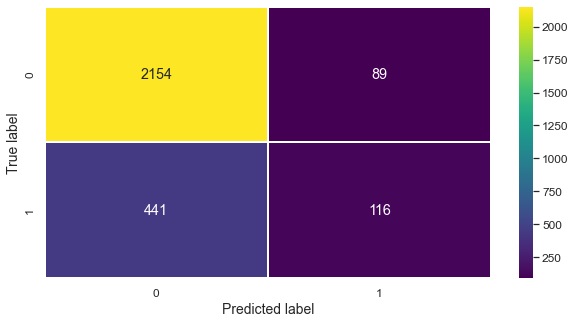

In [40]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(lrcm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
print(classification_report(y_test,lrpred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2243
           1       0.57      0.21      0.30       557

    accuracy                           0.81      2800
   macro avg       0.70      0.58      0.60      2800
weighted avg       0.78      0.81      0.77      2800



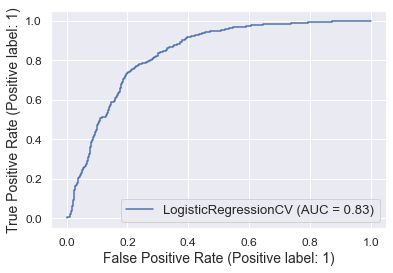

In [42]:
plot_roc_curve(lr,X_test,y_test)
plt.show()

***

### Decision Tree

In [43]:
dt = DecisionTreeClassifier(random_state=0)

In [44]:
parameters = { 'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': np.arange(2,10,2),
               'min_samples_split': np.arange(2,20,3),
               'min_samples_leaf':np.arange(1,10,2)
             }

In [45]:
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [46]:
dt_randm = RandomizedSearchCV(estimator=dt, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=-1, scoring=scoring, refit='f1')

In [47]:
%%time
dt_randm.fit(X_random, y_random)

CPU times: total: 78.1 ms
Wall time: 281 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': array([2, 4, 6, 8]),
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  5,  8, 11, 14, 17])},
                   refit='f1',
                   scoring={'f1', 'precision', 'accuracy', 'recall'})

In [48]:
dt_randm.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=7,
                       random_state=0)

In [49]:
dt_randm.best_score_

0.9299249115234834

In [50]:
dt_randm.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_depth': 6,
 'criterion': 'entropy'}

In [51]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy
                        },
                        ignore_index=True
                       )
  
    return table

In [52]:
# Call the function on our model
dt_result_table = make_results("Decision Tree", dt_randm)

In [53]:
dt_result_table

,Model,F1,Recall,Precision,Accuracy
0,Decision Tree,0.93,0.91,0.95,0.97


### Decision Tree Model

In [54]:
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=14, min_samples_leaf=5, max_depth=6)

In [55]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       min_samples_split=14)

In [56]:
dtpred = dt.predict(X_test)

In [57]:
dtpred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

### DT Model Evaluation

In [58]:
dtcm = confusion_matrix(y_test,dtpred)
dtcm

array([[2228,   15],
       [  40,  517]], dtype=int64)

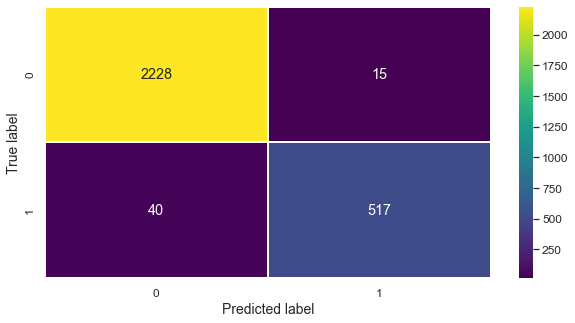

In [59]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(dtcm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [60]:
print(classification_report(y_test,dtpred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2243
           1       0.97      0.93      0.95       557

    accuracy                           0.98      2800
   macro avg       0.98      0.96      0.97      2800
weighted avg       0.98      0.98      0.98      2800



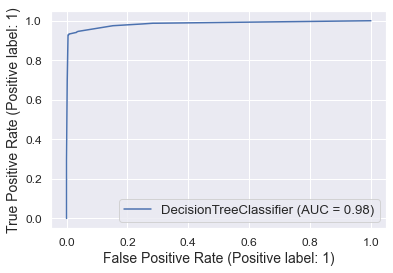

In [61]:
plot_roc_curve(dt,X_test,y_test)
plt.show()

### Plot Tree

In [62]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'work_accident_1', 'promotion_last_5years_1', 'department_RandD', 'department_accounting', 'department_hr', 'department_management', 'department_marketing', 'department_product_mng', 'department_sales', 'department_support', 'department_technical', 'salary_low', 'salary_medium'], dtype='object')

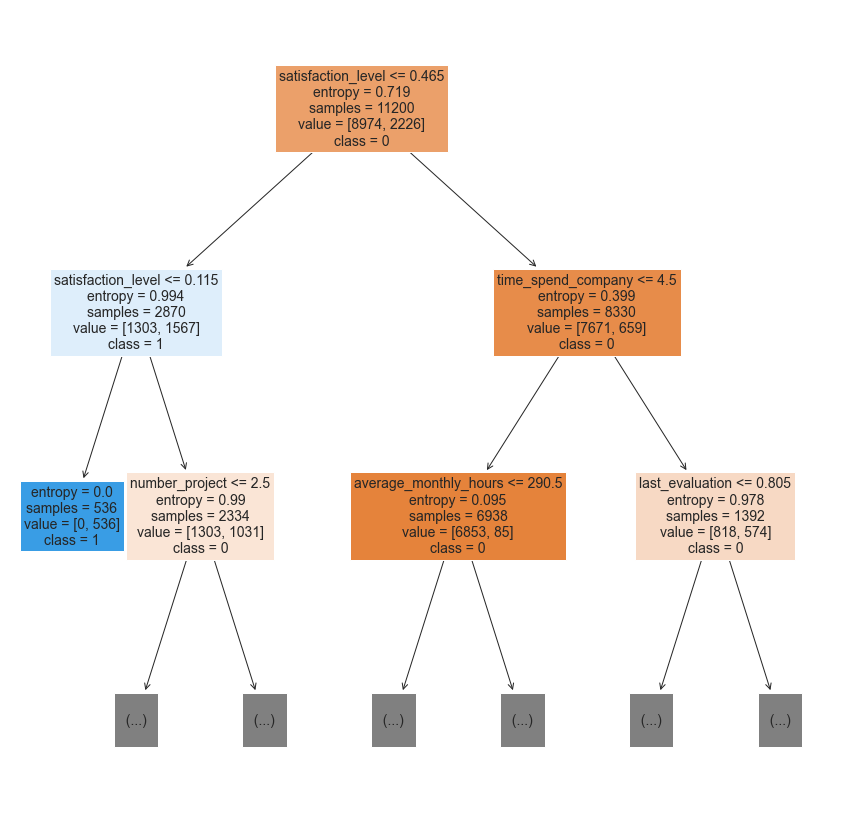

In [63]:
plt.figure(figsize=(15,15))
plot_tree(dt, max_depth=2, feature_names=X.columns,class_names=['0','1'], fontsize=14, filled=True)
plt.show()

***

### Random Forest Model

In [64]:
rf = RandomForestClassifier(random_state=0)

In [65]:
parameters = { 'criterion': ['gini', 'entropy'],
               'n_estimators' : np.arange(50,300,50),
               'max_depth': np.arange(2,10,2),
               'min_samples_split': np.arange(2,20,3),
               'min_samples_leaf':np.arange(1,10,2)
             }

In [66]:
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [67]:
rf_randm = RandomizedSearchCV(estimator=rf, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=-1, scoring=scoring, refit='f1')

In [68]:
%%time
rf_randm.fit(X_random, y_random)

CPU times: total: 812 ms
Wall time: 9.02 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 4, 6, 8]),
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  5,  8, 11, 14, 17]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250])},
                   refit='f1',
                   scoring={'f1', 'precision', 'accuracy', 'recall'})

In [69]:
rf_randm.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=5, min_samples_split=17,
                       n_estimators=250, random_state=0)

In [70]:
rf_randm.best_score_

0.9361925694768811

In [71]:
rf_randm.best_params_

{'n_estimators': 250,
 'min_samples_split': 17,
 'min_samples_leaf': 5,
 'max_depth': 8,
 'criterion': 'gini'}

In [72]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy
                        },
                        ignore_index=True
                       )
  
    return table

In [73]:
# Call the function on our model
rf_result_table = make_results("Random Forest", rf_randm)

In [74]:
rf_result_table

,Model,F1,Recall,Precision,Accuracy
0,Random Forest,0.94,0.90,0.98,0.98


### Random Forest Model

In [75]:
rf = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=1,
                       min_samples_split=14, n_estimators=100, random_state=0)

In [76]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=14, random_state=0)

In [77]:
rfpred = rf.predict(X_test)

In [78]:
rfpred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

### RF Model Evaluation

In [79]:
rfcm = confusion_matrix(y_test,rfpred)
rfcm

array([[2239,    4],
       [  46,  511]], dtype=int64)

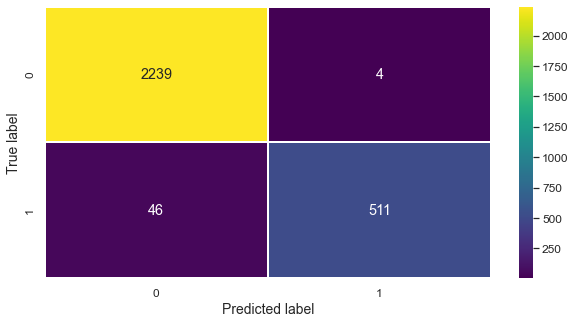

In [80]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(rfcm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [81]:
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2243
           1       0.99      0.92      0.95       557

    accuracy                           0.98      2800
   macro avg       0.99      0.96      0.97      2800
weighted avg       0.98      0.98      0.98      2800



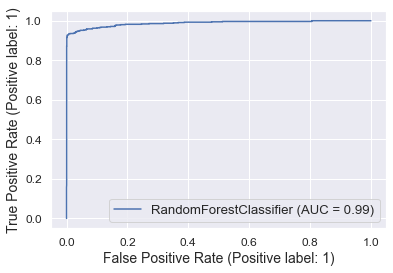

In [82]:
plot_roc_curve(rf,X_test,y_test)
plt.show()

### Cross-Validation

In [83]:
cv = cross_val_score(rf,X,y,cv=5,verbose=1,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s finished


In [84]:
cv.mean()

0.979142857142857

## Combining all 3 results into one table

In [87]:
result_table = pd.concat([lr_result_table, dt_result_table, rf_result_table], axis=0)

In [88]:
result_table

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.00,0.00,0.00,0.80
0,Decision Tree,0.93,0.91,0.95,0.97
0,Random Forest,0.94,0.90,0.98,0.98


## Test/Predicted Table Formatted View

In [ ]:
table = X_test.copy()

In [ ]:
table["True Value"] = y_test.copy()

In [ ]:
table["Predicted"] = np.round(rfpred)

In [ ]:
table

## Test Data Prediction

In [ ]:
testdata = pd.read_csv("test2.csv")

In [ ]:
testdata.head()

In [ ]:
answer = rf.predict(testdata)

In [ ]:
answer[0:10]

In [ ]:
answer = pd.Series(answer)

### Comparing with test data original

In [ ]:
testdata2 = pd.read_csv("test.csv")

In [ ]:
testdata2.head()

In [ ]:
original = testdata2["left"]
original

In [ ]:
type(original)

In [ ]:
table2 = pd.concat([original,answer], axis=1, names=['Original','Predicted'])

In [ ]:
table2

### Using XGBoost (Scikit-Learn)

### Using RandomSearchCV

In [ ]:
xgc = XGBClassifier(random_state=0, n_estimators=100, objective='binary:logistic')

In [ ]:
parameters = {'max_depth': np.arange(3,10,1),
              'eta': np.arange(0.05,0.3,0.05),
              'n_estimators':np.arange(50,300,50),
              'min_child_weight': np.arange(1,5,1),
              'gamma':np.arange(0,10,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1),
              'reg_alpha':np.arange(0,1,0.1),
              'reg_lambda':np.arange(0,1,0.1)
             }

In [ ]:
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [ ]:
xg_randm = RandomizedSearchCV(estimator=xgc, param_distributions = parameters, cv = 5, n_iter = 10, 
                           n_jobs=-1, scoring=scoring, refit='f1')

In [ ]:
xg_randm.fit(X_random, y_random)

In [ ]:
xg_randm.best_estimator_

In [ ]:
xg_randm.best_score_

In [ ]:
xg_randm.best_params_

### Final XGBoost Model

In [ ]:
xgbmodel = XGBClassifier(random_state=0, subsample = 0.5, reg_lambda = 0.4, reg_alpha = 0.5,
                         n_estimators = 250, min_child_weight = 1,  max_depth = 7,
                         gamma = 0, eta = 0.1, colsample_bytree = 0.6, objective='binary:logistic')

In [ ]:
xgbmodel.fit(X_train,y_train, eval_set=[(X_test,y_test)], eval_metric='error', early_stopping_rounds=10)

In [ ]:
xgb_pred = xgbmodel.predict(X_test)

In [ ]:
xgb_pred

### Model Evaluation

In [ ]:
xgbcm = confusion_matrix(y_test,xgb_pred)
xgbcm

In [ ]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(xgbcm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(y_test,xgb_pred))

In [ ]:
plot_roc_curve(xgbmodel,X_test,y_test)
plt.show()

### Plot Feature Importances

In [ ]:
xgbmodel.feature_importances_

In [ ]:
feat_importances = pd.Series(xgbmodel.feature_importances_, index=X.columns)

In [ ]:
feat_importances

In [ ]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances')
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [ ]:
X.columns

In [ ]:
xgbmodel.get_booster().feature_names = ['satisfaction_level', 'last_evaluation', 'number_project', 
                                        'average_monthly_hours', 'time_spend_company', 'work_accident_1', 
                                        'promotion_last_5years_1', 'department_RandD', 'department_accounting', 
                                        'department_hr', 'department_management', 'department_marketing', 
                                        'department_product_mng', 'department_sales', 'department_support', 
                                        'department_technical', 'salary_low', 'salary_medium']

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

### Cross-Validation

In [ ]:
cv = cross_val_score(xgbmodel,X,y,cv=5,verbose=1,scoring='accuracy')

In [ ]:
cv.mean()

### Save the Model

In [ ]:
filename = 'model.sav'
dump(xgbnew,open(filename,'wb'))

### Load the Model

In [ ]:
loaded_model = load(open(filename,'rb'))

In [ ]:
loaded_model

#### Python code done by Dennis Lam